# A Data Science Blog Post of Dublin AIRBnB Data follow the CRISP-DM process in finding our solutions

# Business Questions

### Q1: What are the most popular areas of Dublin versus the least popular.

All of the Neighbourhoods in Dublin score a high review rate of 9/10 and above. Marino, Mount Merrion and Darty are the only 3 Neighbourhoods that score 10/10. Ballymun & Fairview are the only 2 Neighbourhoods in Dublin scored a 9.5/10 for Airbnb reviews in contrast and rest of them are betwwen 9.5 to 10.

### Q2: How does pricing fluctuate over the seasonal periods.

Pricing between the Neighbourhoods, City Centre and the Temple Bar, show a significant difference. We can see that the Temple Bar has large pricing fluctuations in the after summer compared to the other seasons, where as City Centre has little fluctuation in pricing over the seasons. If we look at the mean average of all of Dublin Neighbourhoods for AirBnb rentals, the price on a monthly basis seems to float around the $140 mark. We can see small variations in price per season, in that Summer is more expensive compared to Winter which is the cheapest of all seasons.


### Q3: How Neighbourhood Analysis help us to find good accomdation?

From the above analysis we see that the neighbourhoods of Dublin City have highest mean price, while the neighbourhoods of South Dublin have lowest mean prices. Similarily we see that the neighbourhoods of Dublin city have highest listing counts, while neighbourhoods of South Dublin have lower listing counts but Dublin city have more listing counts compare to Dn Laoghaire-Rathdown	





In [173]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins

#Import CSV files as dataframes
df_calendar = pd.read_csv("calendar.csv")
df_listings = pd.read_csv("listings.csv")
df_reviews = pd.read_csv("reviews.csv")


C:\Users\PRATEEK PARASHER\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [176]:
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import time
import copy
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [125]:
#we can see that listing ID will be the primary key between the dataframes.
df_calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,14842,2019-09-25,f,$83.00,$83.00,3,5
1,736751,2019-09-25,f,$40.00,$40.00,2,30
2,736751,2019-09-26,f,$40.00,$40.00,2,30
3,736751,2019-09-27,f,$40.00,$40.00,2,30
4,736751,2019-09-28,f,$40.00,$40.00,2,30


In [126]:
#we can see 7 columns containing 3471880 entries
df_calendar.shape

(3471880, 7)

In [127]:
df_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,14842,https://www.airbnb.com/rooms/14842,20190925125416,2019-09-25,Portobello Gem. Entire house. Can sleep 3.,"Beautiful entire house, newly revamped, with s...","Gorgeous, newly revamped central Dublin city e...","Beautiful entire house, newly revamped, with s...",none,Portobello is an exceptional place to live - v...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.43
1,44077,https://www.airbnb.com/rooms/44077,20190925125416,2019-09-25,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,"Hi, My name is Teresa and we have 3 rooms ava...",Our house was built in 1937 when there was ple...,none,I like our neighbourhood as there is no shorta...,...,t,f,moderate,t,t,3,0,0,0,2.05
2,69785,https://www.airbnb.com/rooms/69785,20190925125416,2019-09-25,Number Nine : Ballsbridge,"Cosy and comfortable, the cottage is a surpris...",Number Nine is also the ideal spot for your we...,"Cosy and comfortable, the cottage is a surpris...",business,Ballsbridge has lots of amenitites: restaurant...,...,t,f,strict_14_with_grace_period,t,f,2,2,0,0,1.75
3,85148,https://www.airbnb.com/rooms/85148,20190925125416,2019-09-25,Habitación en Dublín Double room,NaN,I'm renting a double room in my house in the s...,I'm renting a double room in my house in the s...,none,NaN,...,f,f,flexible,f,f,1,0,1,0,0.22
4,85156,https://www.airbnb.com/rooms/85156,20190925125416,2019-09-25,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"Hi , My name is Teresa and we have 3 rooms av...",Our Cottage is a charming light filled cottage...,none,"I love Dundrum and its surrounding areas , The...",...,t,f,moderate,t,t,3,0,0,0,1.60


In [128]:
#9512 entries with 106 columns
df_listings.shape

(9512, 106)

In [129]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [130]:
df_reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,14842,366404,2011-07-11,381202,Gianni,Hilary and her husband were very welcoming and...
1,14842,436714,2011-08-11,393419,Andrea,Great place. Great location. Hilary was extrem...
2,14842,825239,2012-01-02,205507,Rebecca,Unfortunately Hilary's house cannot be recomme...


In [131]:
#a nice simple dataframe with date, comment and listing_id
df_reviews.shape

(358446, 6)

In [134]:
listings_null = (df_listings.isnull().sum()/len(df_listings))*100
listings_null.value_counts()
nulls = listings_null[listings_null == 100]
nulls = nulls.index

print(nulls)
#drop the empty columns
df_listings = df_listings.drop(nulls, axis=1)

Index(['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate',
       'neighbourhood_group_cleansed', 'jurisdiction_names'],
      dtype='object')


In [135]:
print(((df_listings.isnull().sum()/len(df_listings))*100).value_counts())
#we can see all columns with 100# missing values are gone


0.000000     52
0.021026     10
14.550042     3
32.884777     2
16.253154     2
44.196804     1
0.010513      1
0.042052      1
16.211102     1
99.695122     1
47.886880     1
32.180404     1
16.179563     1
26.450799     1
32.926829     1
3.469302      1
2.733389      1
36.343566     1
16.221615     1
12.825904     1
49.011775     1
95.058873     1
37.268713     1
92.703953     1
43.523970     1
0.115643      1
41.547519     1
0.126156      1
39.886459     1
0.683347      1
16.105971     1
99.716148     1
1.923886      1
0.420521      1
16.190076     1
61.942809     1
dtype: int64


In [136]:
#new dataframe for review scoring and an average overall score /10
scores = df_listings[[u'id', u'neighbourhood', u'review_scores_accuracy',u'review_scores_cleanliness',
       u'review_scores_checkin', u'review_scores_communication',
       u'review_scores_location', u'review_scores_value', u'review_scores_rating']]

scores['total_review'] = (scores['review_scores_cleanliness'] + scores['review_scores_checkin'] 
            + scores['review_scores_communication'] + scores['review_scores_location'] + 
            scores['review_scores_value'] + scores['review_scores_accuracy'])/6
scores.head(10)

C:\Users\PRATEEK PARASHER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,neighbourhood,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_scores_rating,total_review
0,14842,Portobello,10.0,9.0,10.0,10.0,10.0,9.0,95.0,9.666667
1,44077,Churchtown,10.0,10.0,10.0,10.0,10.0,10.0,95.0,10.000000
2,69785,Ballsbridge,10.0,9.0,10.0,9.0,9.0,9.0,96.0,9.333333
3,85148,Templeogue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85156,Churchtown,10.0,10.0,10.0,10.0,9.0,10.0,96.0,9.833333
5,121030,Sandymount,9.0,9.0,10.0,9.0,9.0,9.0,94.0,9.166667
6,159889,Beaumont,10.0,9.0,10.0,10.0,10.0,10.0,95.0,9.833333
7,162809,Blackrock,10.0,10.0,10.0,10.0,10.0,10.0,96.0,10.000000
8,165828,Inchicore,10.0,9.0,10.0,9.0,8.0,9.0,90.0,9.166667
9,165829,Inchicore,10.0,10.0,9.0,9.0,9.0,9.0,94.0,9.333333


In [137]:
scores = scores.dropna()
# as we have no catergorical variables in our list, we can simply perform a Drop all NaN's on our dataset.
# no data therefore needs to be re-encoded for our listings

In [138]:
#creating a dataframe for average mean scores of total reviews
avg_score = scores.groupby('neighbourhood')['total_review'].mean()
avg_score

neighbourhood
Addison Park                           9.730159
Ardilea                                9.520000
Artane                                 9.693694
Ballinteer                             9.601852
Ballsbridge                            9.531532
Ballybough                             9.370370
Ballyfermot                            9.676190
Ballymun                               9.285088
Beaumont                               9.446237
Blackrock                              9.630117
Bonnybrook/Darndale                    9.717054
Booterstown                            9.739394
Cabra                                  9.436047
Castleknock                            9.575092
Churchtown                             9.729167
City Centre                            9.460773
Clondalkin                             9.601852
Clontarf                               9.724014
Courtlands                             9.616667
Crumlin                                9.411392
Dartry                    

In [139]:
df_cal = df_calendar.copy()
df_cal = df_cal.rename(columns={'listing_id':'id'})
df_cal1=df_cal
#print(df_cal.price.isnull().sum()) # we can see half the results don't have a price. 
#We will drop these, no price means it is not available
#df_cal = df_cal.dropna()
df_cal.head(5)
#we need to drop the $ sign.

,id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,14842,2019-09-25,f,$83.00,$83.00,3,5
1,736751,2019-09-25,f,$40.00,$40.00,2,30
2,736751,2019-09-26,f,$40.00,$40.00,2,30
3,736751,2019-09-27,f,$40.00,$40.00,2,30
4,736751,2019-09-28,f,$40.00,$40.00,2,30


In [140]:
#converting to a string and removing the '$'
print(df_cal.price.dtype)
df_cal.price.astype(str)
df_cal['price'] = df_cal['price'].str.replace('$','')
df_cal['price'] = df_cal['price'].str.replace(',','')
df_cal['price'] = df_cal['price'].astype(float)
df_cal.head(3)

object


,id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,14842,2019-09-25,f,83.0,$83.00,3,5
1,736751,2019-09-25,f,40.0,$40.00,2,30
2,736751,2019-09-26,f,40.0,$40.00,2,30


In [141]:
score_cal = scores.merge(df_cal, on='id', how='left')
score_cal

,id,neighbourhood,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_scores_rating,total_review,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,14842,Portobello,10.0,9.0,10.0,10.0,10.0,9.0,95.0,9.666667,2019-09-25,f,83.0,$83.00,3,5
1,14842,Portobello,10.0,9.0,10.0,10.0,10.0,9.0,95.0,9.666667,2019-09-26,t,118.0,$118.00,3,5
2,14842,Portobello,10.0,9.0,10.0,10.0,10.0,9.0,95.0,9.666667,2019-09-27,t,118.0,$118.00,3,5
3,14842,Portobello,10.0,9.0,10.0,10.0,10.0,9.0,95.0,9.666667,2019-09-28,t,118.0,$118.00,3,5
4,14842,Portobello,10.0,9.0,10.0,10.0,10.0,9.0,95.0,9.666667,2019-09-29,t,118.0,$118.00,3,5
5,14842,Portobello,10.0,9.0,10.0,10.0,10.0,9.0,95.0,9.666667,2019-09-30,t,118.0,$118.00,3,5
6,14842,Portobello,10.0,9.0,10.0,10.0,10.0,9.0,95.0,9.666667,2019-10-01,f,83.0,$83.00,3,5
7,14842,Portobello,10.0,9.0,10.0,10.0,10.0,9.0,95.0,9.666667,2019-10-02,f,83.0,$83.00,3,5
8,14842,Portobello,10.0,9.0,10.0,10.0,10.0,9.0,95.0,9.666667,2019-10-03,f,83.0,$83.00,3,5
9,14842,Portobello,10.0,9.0,10.0,10.0,10.0,9.0,95.0,9.666667,2019-10-04,f,83.0,$83.00,3,5


In [142]:
score_cal['month'] = (pd.to_datetime(score_cal['date']).dt.month)

In [143]:

score_cal.groupby('neighbourhood').count()

,id,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_scores_rating,total_review,date,available,price,adjusted_price,minimum_nights,maximum_nights,month
neighbourhood,,,,,,,,,,,,,,,,
Addison Park,7665,7665,7665,7665,7665,7665,7665,7665,7665,7665,7665,7665,7665,7665,7665,7665
Ardilea,9125,9125,9125,9125,9125,9125,9125,9125,9125,9125,9125,9125,9125,9125,9125,9125
Artane,27010,27010,27010,27010,27010,27010,27010,27010,27010,27010,27010,27010,27010,27010,27010,27010
Ballinteer,6570,6570,6570,6570,6570,6570,6570,6570,6570,6570,6570,6570,6570,6570,6570,6570
Ballsbridge,121545,121545,121545,121545,121545,121545,121545,121545,121545,121545,121545,121545,121545,121545,121545,121545
Ballybough,13140,13140,13140,13140,13140,13140,13140,13140,13140,13140,13140,13140,13140,13140,13140,13140
Ballyfermot,12775,12775,12775,12775,12775,12775,12775,12775,12775,12775,12775,12775,12775,12775,12775,12775
Ballymun,13870,13870,13870,13870,13870,13870,13870,13870,13870,13870,13870,13870,13870,13870,13870,13870
Beaumont,22630,22630,22630,22630,22630,22630,22630,22630,22630,22630,22630,22630,22630,22630,22630,22630


In [144]:
#City Centre by Monthly Average for price
City_Centre = score_cal[score_cal['neighbourhood'] == 'City Centre']
City_cal = City_Centre.groupby('month').mean()
x = City_cal.price
print(x)

month
1     124.320256
2     118.801841
3     126.641601
4     123.124324
5     124.241136
6     126.420721
7     125.451431
8     124.443585
9     124.994447
10    112.842633
11    113.535248
12    125.043955
Name: price, dtype: float64


In [145]:
#Temple Bar by Monthly Average for price
Temple_Bar = score_cal[score_cal['neighbourhood'] == 'Temple Bar']
Temple_cal = Temple_Bar.groupby('month').mean()
T = Temple_cal.price
print(T)

month
1     182.277115
2     171.327993
3     192.822454
4     186.327297
5     192.917704
6     194.100525
7     194.251715
8     197.319279
9     194.358947
10    159.258827
11    155.394488
12    178.325883
Name: price, dtype: float64


In [146]:
#find the total average cost of rent by month for all Airbnb's in Dublin.
avg_all = score_cal.groupby('month').mean()
avg_all = avg_all.price
avg_all

month
1     138.181017
2     137.324144
3     143.261464
4     140.323733
5     141.957706
6     143.187902
7     142.724528
8     142.775395
9     139.992185
10    131.285624
11    131.579501
12    137.503737
Name: price, dtype: float64

In [147]:

def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for listings & calendar
    data
    
    INPUT: Dataframes for location & listing
    OUTPUT: Trimmed and cleaned df for listing and location centred on reviews
    """    
    
    
    #removing unnecesarry columns and rows
    listings_null = (df_listings.isnull().sum()/len(df_listings))*100
    listings_null.value_counts()
    nulls = listings_null[listings_null == 100]
    nulls = nulls.index
    df = listings_null.drop(nulls, axis=1)
    
    #rename ID's to match main dataframe
    df = df.rename(columns={'listing_id':'id'})
    
    #new dataframe for review scoring and an average overall score /10
    df = df_listings[[u'id', u'neighbourhood', u'review_scores_accuracy',u'review_scores_cleanliness',
       u'review_scores_checkin', u'review_scores_communication',
       u'review_scores_location', u'review_scores_value', u'review_scores_rating']]

    df['total_review'] = (scores['review_scores_cleanliness'] + scores['review_scores_checkin'] 
            + scores['review_scores_communication'] + scores['review_scores_location'] + 
            scores['review_scores_value'] + scores['review_scores_accuracy'])/6
    
    df = df.dropna()
    # as we have no catergorical variables in our list, we can simply perform a Drop all NaN's on our dataset.
    # no data therefore needs to be re-encoded for our listings
    
    df_cal = df_calendar.copy()
    df_cal = df_cal.rename(columns={'listing_id':'id'})
    #print(df_cal.price.isnull().sum()) # we can see half the results don't have a price. 
    #We will drop these, no price means it is not available
    #df_cal = df_cal.dropna()
    #we need to drop the $ sign. 
    #converting to a string and removing the '$'
    print(df_cal.price.dtype)
    df_cal.price.astype(str)
    df_cal['price'] = df_cal['price'].str.replace('$','')
    df_cal['price'] = df_cal['price'].str.replace(',','')
    df_cal['price'] = df_cal['price'].astype(float)
    
    
    #merge DF into a clean scores DF
    df = df.merge(df_cal, on='id', how='left')
    #creating a month column
    df['month'] = (pd.to_datetime(df['date']).dt.month)
    
    return df

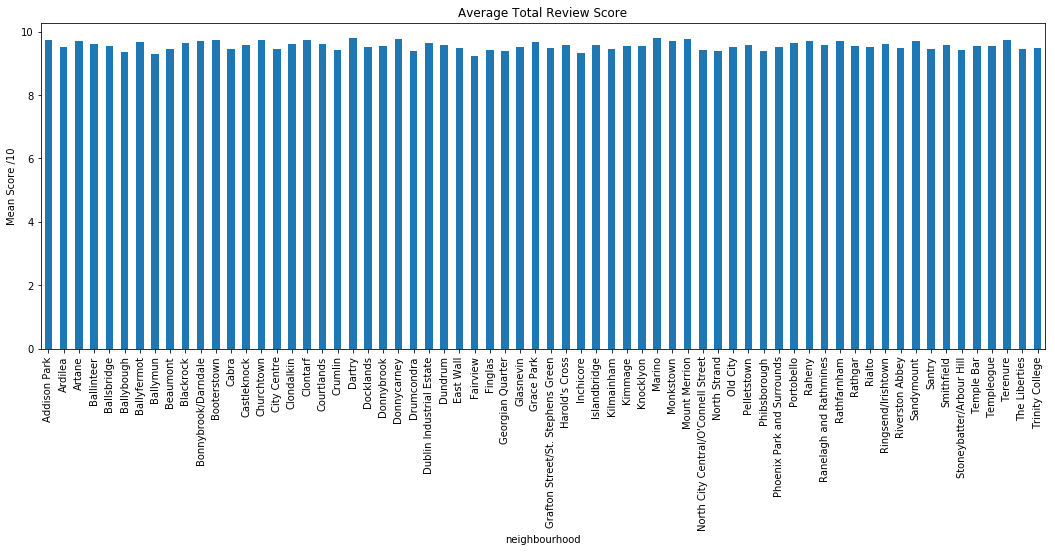

In [154]:
avg_score.plot(kind='bar', title='Average Total Review Score',figsize=(18, 6))
plt.ylabel('Mean Score /10');

All of the Neighbourhoods in Dublin score a high review rate of 9/10 and above. Marino, Mount Merrion and Darty are the only 3 Neighbourhoods that score 10/10. Ballymun & Fairview are the only 2 Neighbourhoods in Dublin scored a 9.5/10 for Airbnb reviews in contrast and rest of them are betwwen 9.5 to 10.

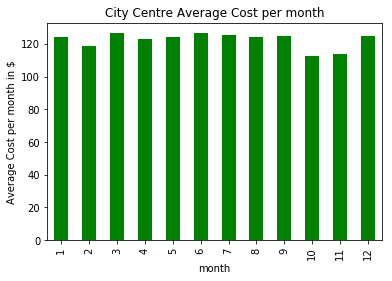

In [155]:
#Monthly Price fluctuations of the most popularly reviewed area (City Centre )
plt.ylabel('Average Cost per month in $')
x.plot(kind='bar', color='green', title='City Centre Average Cost per month');

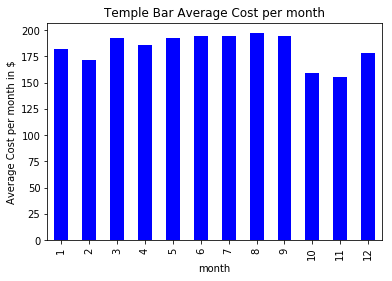

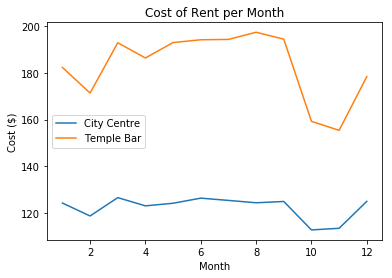

In [156]:
#Now lets find the Monthly average cost of the lowest review rated neighbourhood in Temple Bar
plt.ylabel('Average Cost per month in $')
c.plot(kind='bar', color='b', title='Temple Bar Average Cost per month');

#plotting on the same plot
fig, ax = plt.subplots()
plt.title('Cost of Rent per Month')
plt.ylabel('Cost ($)')
plt.xlabel('Month')
ax.plot(x, label='City Centre')
ax.plot(c, label='Temple Bar')
plt.legend()

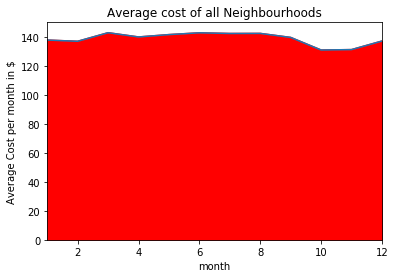

In [157]:
plt.ylabel('Average Cost per month in $')
avg_all.plot(kind='area', color='r', title='Average cost of all Neighbourhoods')
avg_all.plot(kind='line');

In [178]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [179]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,14842,https://www.airbnb.com/rooms/14842,20190925125416,2019-09-25,Portobello Gem. Entire house. Can sleep 3.,"Beautiful entire house, newly revamped, with s...","Gorgeous, newly revamped central Dublin city e...","Beautiful entire house, newly revamped, with s...",none,Portobello is an exceptional place to live - v...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.43
1,44077,https://www.airbnb.com/rooms/44077,20190925125416,2019-09-25,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,"Hi, My name is Teresa and we have 3 rooms ava...",Our house was built in 1937 when there was ple...,none,I like our neighbourhood as there is no shorta...,...,t,f,moderate,t,t,3,0,0,0,2.05
2,69785,https://www.airbnb.com/rooms/69785,20190925125416,2019-09-25,Number Nine : Ballsbridge,"Cosy and comfortable, the cottage is a surpris...",Number Nine is also the ideal spot for your we...,"Cosy and comfortable, the cottage is a surpris...",business,Ballsbridge has lots of amenitites: restaurant...,...,t,f,strict_14_with_grace_period,t,f,2,2,0,0,1.75
3,85148,https://www.airbnb.com/rooms/85148,20190925125416,2019-09-25,Habitación en Dublín Double room,NaN,I'm renting a double room in my house in the s...,I'm renting a double room in my house in the s...,none,NaN,...,f,f,flexible,f,f,1,0,1,0,0.22
4,85156,https://www.airbnb.com/rooms/85156,20190925125416,2019-09-25,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"Hi , My name is Teresa and we have 3 rooms av...",Our Cottage is a charming light filled cottage...,none,"I love Dundrum and its surrounding areas , The...",...,t,f,moderate,t,t,3,0,0,0,1.60


In [180]:
columns_neighbourhood = ['id', 'property_type', 'room_type', 'neighbourhood', 'neighbourhood_cleansed',
               'zipcode', 'price']

listings_neighbourhood = df_listings[columns_neighbourhood]
listings_neighbourhood.head()

,id,property_type,room_type,neighbourhood,neighbourhood_cleansed,zipcode,price
0,14842,House,Entire home/apt,Portobello,Dublin City,Dublin 8,$119.00
1,44077,Bed and breakfast,Hotel room,Churchtown,Dn Laoghaire-Rathdown,Dublin 14,$50.00
2,69785,Cabin,Entire home/apt,Ballsbridge,Dublin City,NaN,$130.00
3,85148,House,Private room,Templeogue,South Dublin,NaN,$30.00
4,85156,Bed and breakfast,Hotel room,Churchtown,Dn Laoghaire-Rathdown,Dublin 14,$50.00


In [181]:
# Lets describe each of the features
listings_neighbourhood.describe(include='all')

,id,property_type,room_type,neighbourhood,neighbourhood_cleansed,zipcode,price
count,9.512000e+03,9512,9512,8292,9512,4850,9512
unique,NaN,33,4,67,4,2854,342
top,NaN,Apartment,Entire home/apt,City Centre,Dublin City,8,$50.00
freq,NaN,4493,4790,1048,7323,103,485
mean,2.188755e+07,NaN,NaN,NaN,NaN,NaN,NaN
std,1.017528e+07,NaN,NaN,NaN,NaN,NaN,NaN
min,1.484200e+04,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.397055e+07,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.211670e+07,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.044835e+07,NaN,NaN,NaN,NaN,NaN,NaN



 property_type 



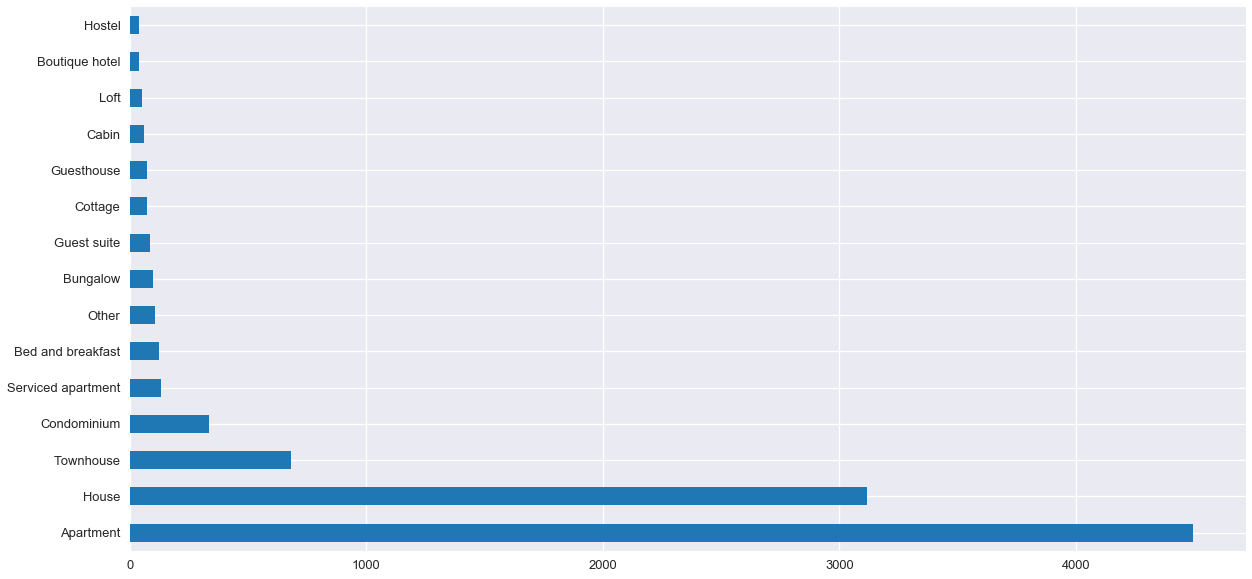

In [205]:
# Lets analyse the listing by different Property Type
count_values = ['neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type']

def plot_value (col):
    print('\n', col ,'\n' )
    listings_neighbourhood[col].value_counts().plot(kind = 'barh' , figsize = (20,10));
    
plot_value ('property_type')

 This helps us understand the spread of various accommodation

In [184]:
def remove_dollar(column_name, dataset_name):
    ''' 
    The function will remove dollar from the given dataset and column
    '''
    dataset_name[column_name] = dataset_name[column_name].str.replace('$','').str.replace(',','');

In [186]:
def make_numeric(column_name, dataset_name):
    ''' 
    The function will convert dataset to numeric type
    '''
    dataset_name[column_name] = pd.to_numeric(dataset_name[column_name]);

In [187]:

remove_dollar('price', listings_neighbourhood)
make_numeric('price', listings_neighbourhood)

C:\Users\PRATEEK PARASHER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [188]:
listings_neighbourhood.describe()

,id,price
count,9.512000e+03,9512.000000
mean,2.188755e+07,133.116590
std,1.017528e+07,333.487458
min,1.484200e+04,0.000000
25%,1.397055e+07,55.000000
50%,2.211670e+07,90.000000
75%,3.044835e+07,150.000000
max,3.888362e+07,22337.000000


In [189]:
# Lets replace any value that repated 30 times or less to ''other''

prop_tp = listings_neighbourhood['property_type'].value_counts()
for c in range(len(prop_tp)):
    val = prop_tp.values[c] 
    ind = prop_tp.index[c]
    if val <= 30:
        listings_neighbourhood['property_type']=listings_neighbourhood['property_type'].replace(ind,'Other');

C:\Users\PRATEEK PARASHER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [190]:
listings_neighbourhood = listings_neighbourhood.drop(['neighbourhood', 'zipcode'] , axis = 1)

In [210]:
listings_neighbourhood.head(20)

,id,property_type,room_type,neighbourhood_cleansed,price
0,14842,House,Entire home/apt,Dublin City,119.0
1,44077,Bed and breakfast,Hotel room,Dn Laoghaire-Rathdown,50.0
2,69785,Cabin,Entire home/apt,Dublin City,130.0
3,85148,House,Private room,South Dublin,30.0
4,85156,Bed and breakfast,Hotel room,Dn Laoghaire-Rathdown,50.0
5,121030,House,Private room,Dublin City,55.0
6,159889,House,Private room,Dublin City,29.0
7,162809,Townhouse,Private room,Dn Laoghaire-Rathdown,55.0
8,165828,Apartment,Entire home/apt,Dublin City,147.0
9,165829,Apartment,Entire home/apt,Dublin City,135.0


In [207]:
neighbourhood_count = pd.DataFrame()
neighbourhood_count['count'] = listings_neighbourhood['neighbourhood_cleansed'].value_counts()
neighbourhood_mean = pd.DataFrame()
neighbourhood_mean['mean_price'] = listings_neighbourhood.groupby(listings_neighbourhood['neighbourhood_cleansed'])['price'].mean()
neighbourhood_info = pd.merge(neighbourhood_mean, neighbourhood_count, left_on = neighbourhood_mean.index,right_on = neighbourhood_count.index)

In [208]:
neighbourhood_info.index = neighbourhood_info.key_0


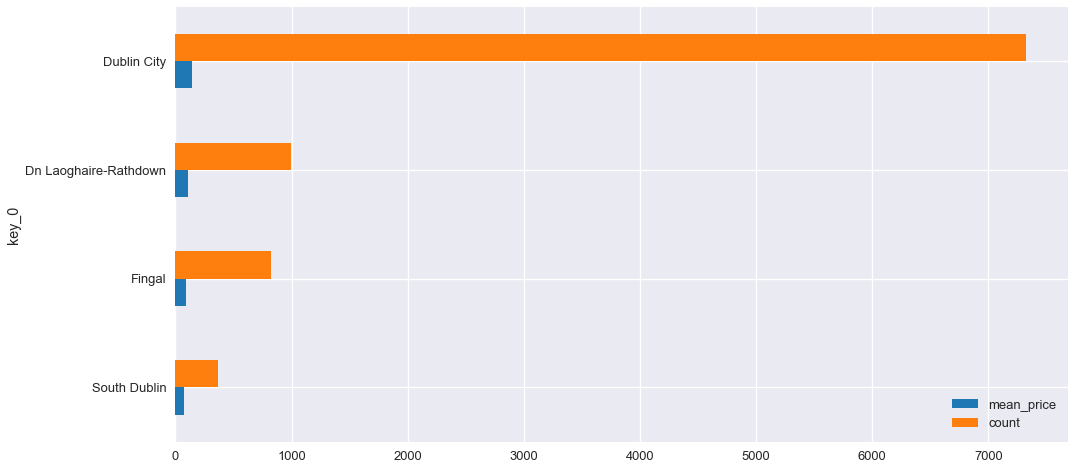

In [209]:
plt.rcParams.update({'font.size': 8})
neighbourhood_info.sort_values(by = 'mean_price').plot(kind = 'barh',figsize = (16,8));